# Lab04 
20th June 2024 
Today objectiove is datafitting (fitting linear models and quadratic fitting) using numpy, scipy. 


# Question One

In [168]:
import numpy as np 
import scipy
import matplotlib.pyplot as plt
from numpy import empty, linspace, array, ones, log, exp, reshape
from scipy.linalg import lstsq, solve, qr, solve_triangular, svd, norm
from numpy.linalg import cond
from matplotlib.pyplot import figure, plot, xlim, xlabel, ylabel, grid, legend, title

# defining variables
m = 7 
tdat = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3])
ydat = np.array([1.2, 1.5, 1.9, 2.4, 3.2, 4.3, 5.4])

# Linear regression with 2 parameters constant + B
A = ones((np.shape(ydat)[0], 2))
A[:,1] = tdat

# find our regression parameters
x1 = scipy.linalg.lstsq(A, ydat)

# using normal questions (A.TA)x = A.Ty
x2 = scipy.linalg.lstsq(A.T @ A , A.T @ ydat.reshape((7,1)))
print(x2)
# Using QR a.k.a EigenDecomposition so Ax = y -> QRx=y 
Q, R = scipy.linalg.qr(A)
x3 = scipy.linalg.lstsq(np.dot(Q,R), ydat)

# using SVD
U, S, VT = scipy.linalg.svd(A, full_matrices=False)
z = U.T @ ydat/S
x4 = VT.T @ z



(array([[0.75357143],
       [1.39285714]]), array([], dtype=float64), 2, array([28.  ,  1.75]))


In [76]:
# calcualting condition numbers for each method
# condition number for Ax = y 
condA = np.linalg.cond(A)
# condition number normal question A^TAx = A^Ty
condATA = np.linalg.cond(A.T @ A)
# condition numbers for QR decomposition 
condR = np.linalg.cond(Q @ R)
# condition number SVD
max_sig_value = np.linalg.norm(S, np.inf)
min_sig_value = np.linalg.norm(S, -np.inf)
condSVD = np.divide(max_sig_value, min_sig_value)

print(f"for the normal system Ax = y we have condition number {condA}\n.For the normal question we have {condATA}\n. For QR decompostion we have {condR}")
print(f"for SVD the condition number is {condSVD}")

for the normal system Ax = y we have condition number 3.9999999999999987
 For the normal question we have 15.999999999999996
 and for QR decompostion we have 4.0
for SVD the condition number is 4.000000000000001


Analysis : the lower the condition number the less sensitive the matrix is and thus the more stable. Clearly, the smallest condition numbers for QR/the basic system question. Now from this clearly there is underflow from QR, SVD and normal system so choosing which method to use then requires which ones is the most accurate/ or storage or matrix !

### Measuring Accuracy 

In [186]:
# technically lstq gives out the two norm so we dont actually have to compute it, but we can for arguement stake!

# calculates lhs given param_object from return lstq from scipy 
def calculatinglhs(param_object):
    # Ax = y
    A2 = ones((7,2))
    
    # Fill the first column of A2 with paramter for given method
    A2[:, 0] = param_object[0][0]
    
    # Fill the second column of A2 with params for given method
    A2[:, 1] = param_object[0][1]
    
    # Create x as a 7x2 array with ones in the first column and tdat in the second column
    x = np.ones((7, 2))
    x[:, 1] = tdat
    sol2 = np.array(np.diag(np.dot(A2, x.T)))

    # find 2-norm residuals
    r2nrm = np.linalg.norm(sol2 - ydat, 2)

    return sol2, r2nrm

# Ax = y
r1nrm = x1[1]

# x2 is normal equation 
sol2, res2nrm = calculatinglhs(x2)
# QRx = y 
r3nrm = x3[1]
# VdiagUx = y 


print(f"Ax =y : residual = {r1nrm}\n A.TAx = A.Ty : residual = {r2nrm}\n QRx = y : residual = {r3nrm}")

Ax =y : residual = 0.7967857142857149
 A.TAx = A.Ty : residual = 0.8926285421639363
 QRx = y : residual = 0.7967857142857142


[-0.44642857 -0.05        0.24642857  0.44285714  0.33928571 -0.06428571
 -0.46785714]


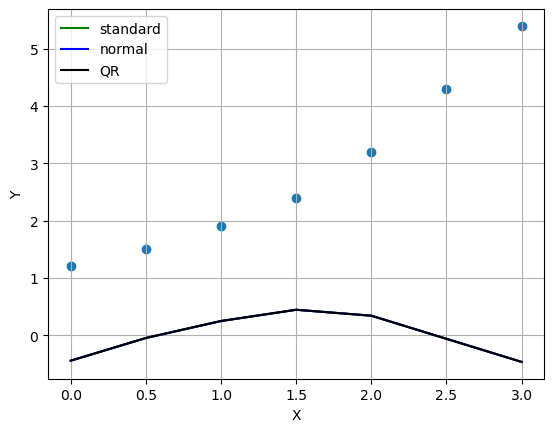

In [187]:
# For each method find the y^ (estimate)
sol1, res1 = calculatinglhs(x1)
sol2, res2 = calculatinglhs(x2)
sol3, res3 = calculatinglhs(x3)

# Calcualting y hat for each method
diff1 = sol1 - ydat
diff2 = sol2 - ydat
diff3 = sol3 - ydat

print(diff1)
# plot the data
plt.figure()
plt.scatter(tdat, ydat)
plt.plot(tdat, diff1, 'green', label='standard')
plt.plot(tdat, diff2, 'blue', label='normal')
plt.plot(tdat, diff3, 'black', label='QR')
plt.legend() 
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()